In [1]:
# pip install jupyter notebook

In [2]:
import yfinance as yf


In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day )

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

C:\Users\Suraj Maurya\AppData\Local\Temp\ipykernel_9560\2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-08-05,7.238431,7.390949,7.212681,7.365943,238478538
2005-08-08,7.211195,7.320137,7.192378,7.269380,179943955
2005-08-09,7.219119,7.246602,7.143355,7.228775,232038489
2005-08-10,7.073286,7.237936,7.053478,7.212433,276191367
2005-08-11,7.032927,7.095569,6.948002,7.078485,301722708


In [6]:
google_data.shape

(5030, 5)

In [7]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5030.000000,5030.000000,5030.000000,5030.000000,5.030000e+03
mean,53.408580,53.960890,52.841199,53.386994,9.543430e+07
std,50.477281,51.027937,49.922360,50.448783,1.187938e+08
min,6.374077,6.669459,6.123017,6.499608,1.584340e+05
25%,14.023764,14.148860,13.881336,13.996157,2.574863e+07
50%,30.495231,31.063852,30.152206,30.518842,4.469262e+07
75%,74.570740,75.326572,73.790624,74.395277,1.196016e+08
max,207.224548,208.212225,203.782599,204.022044,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5030 entries, 2005-08-05 to 2025-08-04
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5030 non-null   float64
 1   (High, GOOG)    5030 non-null   float64
 2   (Low, GOOG)     5030 non-null   float64
 3   (Open, GOOG)    5030 non-null   float64
 4   (Volume, GOOG)  5030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Opening price of Google data')

<Figure size 1500x500 with 0 Axes>

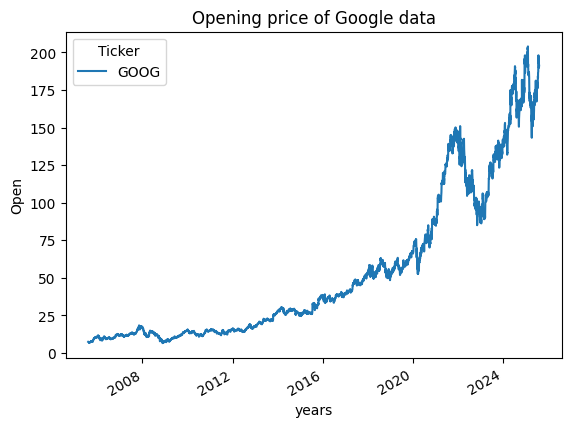

In [11]:
plt.figure(figsize=(15,5))
google_data['Open'].plot()
plt.xlabel("years")
plt.ylabel("Open")
plt.title("Opening price of Google data")

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")


In [13]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

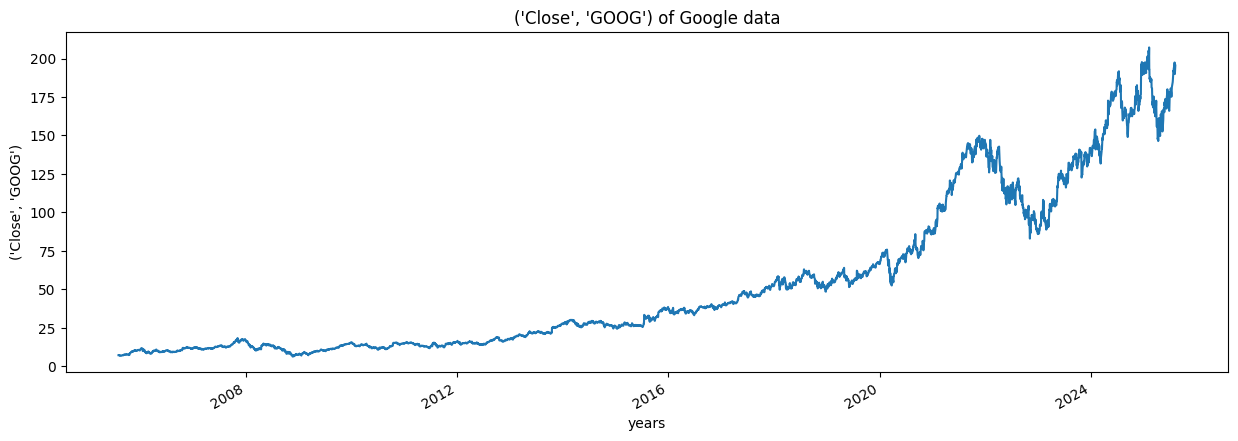

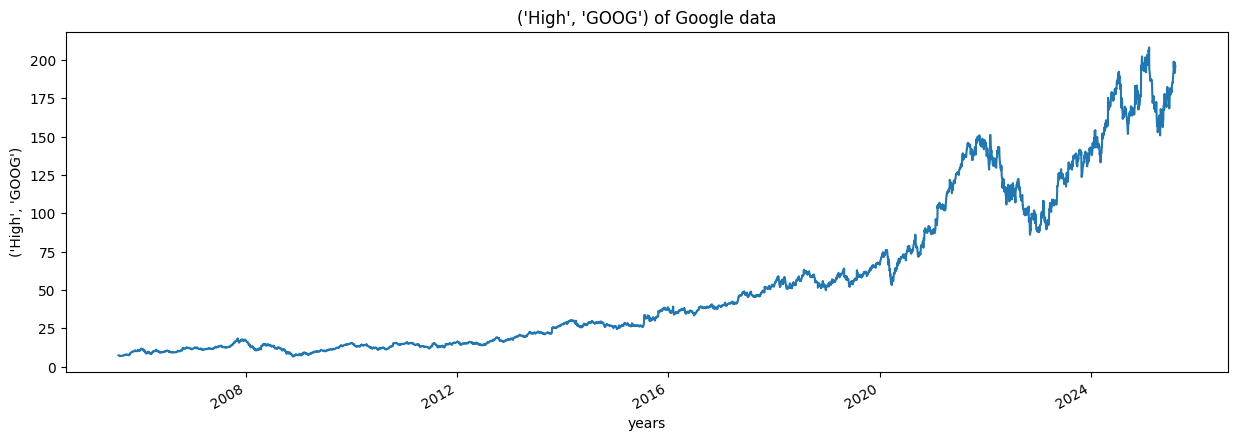

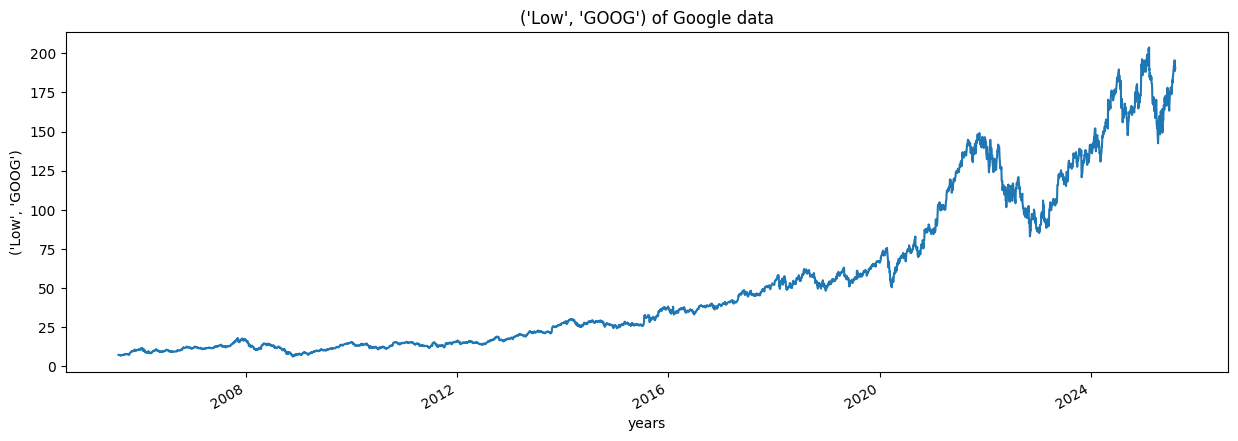

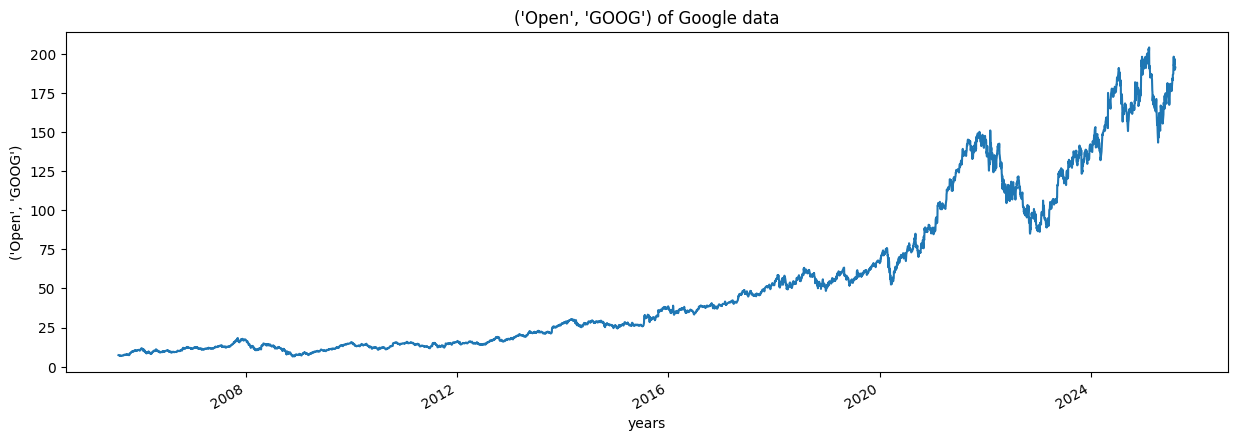

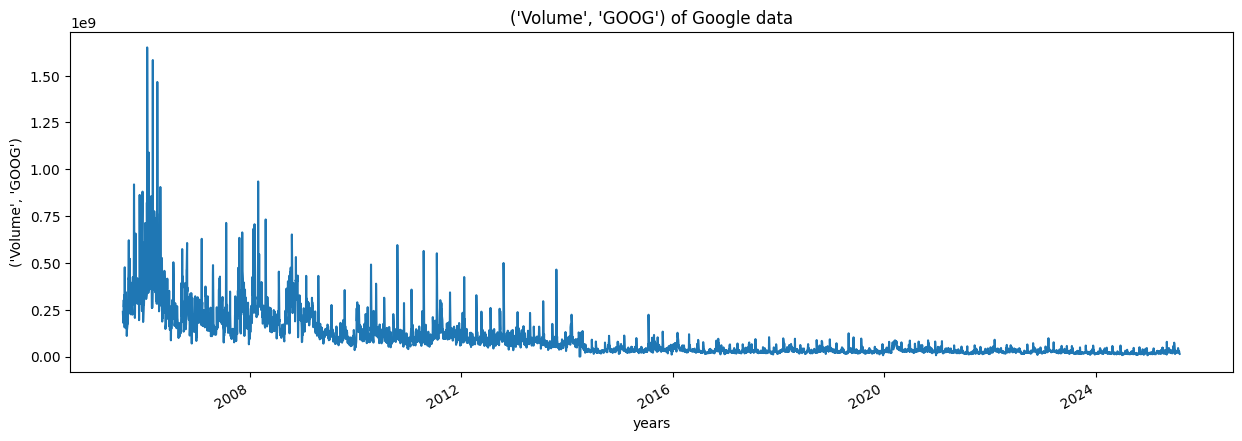

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [15]:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100
MA_for_5_days = [None, None, None, None]

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()


,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2024):
    print(i,list(google_data.index.year).count(i))
    

2004 0
2005 103
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [20]:
google_data['MA_for_250_days'] = google_data['Open'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-07-27         NaN
2006-07-28         NaN
2006-07-31         NaN
2006-08-01         NaN
2006-08-02    9.301215
Name: MA_for_250_days, dtype: float64

<Figure size 640x480 with 0 Axes>

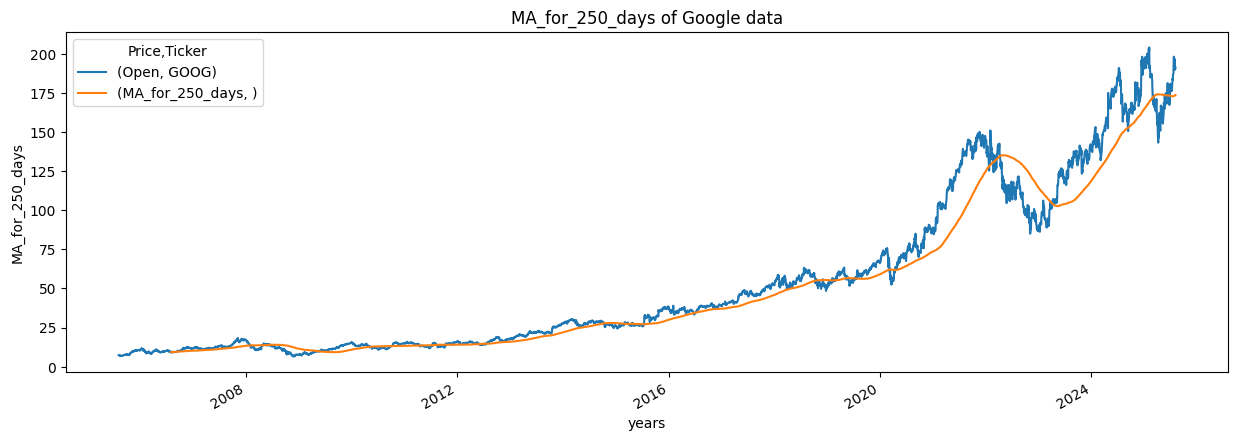

In [22]:
plot_graph((15,5), google_data[['Open','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

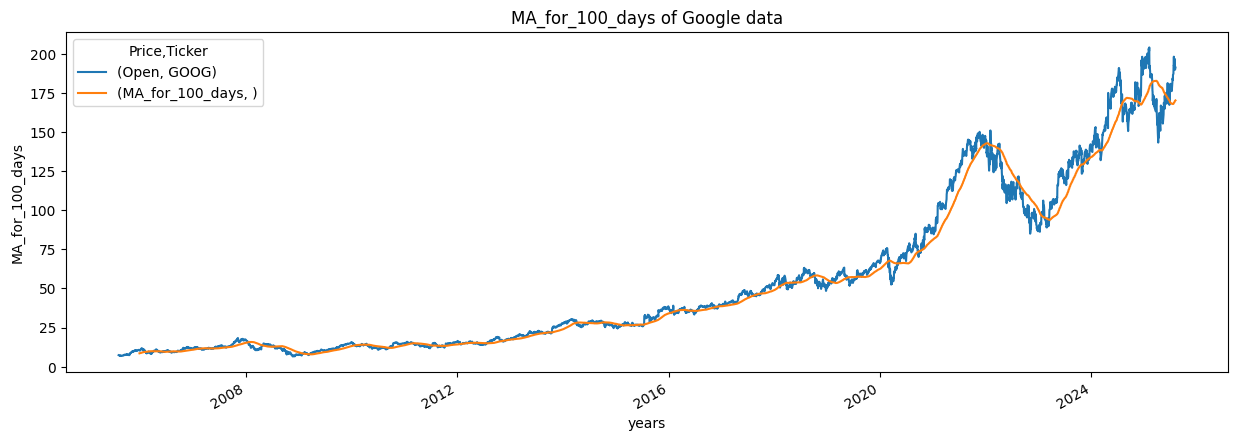

In [23]:
google_data['MA_for_100_days'] = google_data['Open'].rolling(100).mean()
plot_graph((15,5), google_data[['Open','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

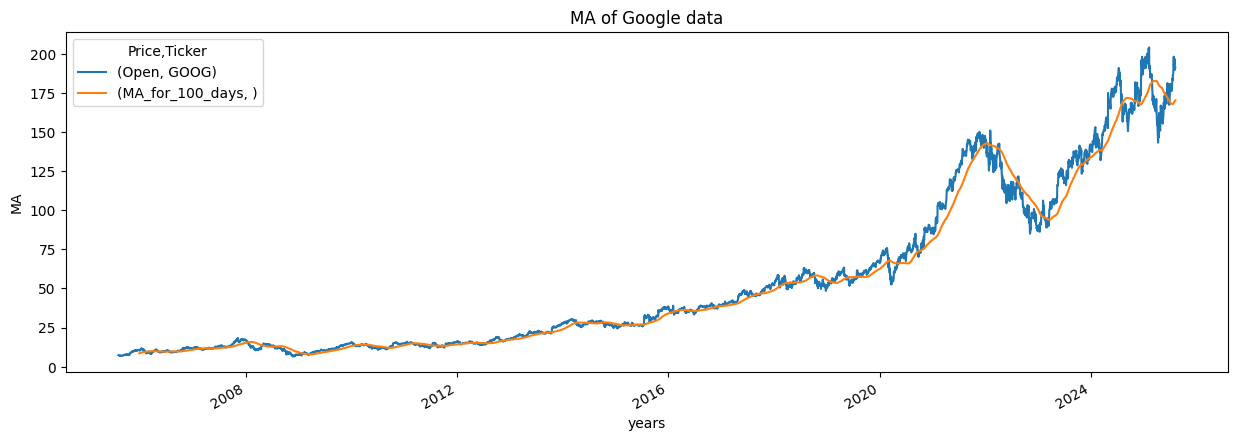

In [24]:
plot_graph((15,5), google_data[['Open','MA_for_100_days']],'MA')

<Figure size 640x480 with 0 Axes>

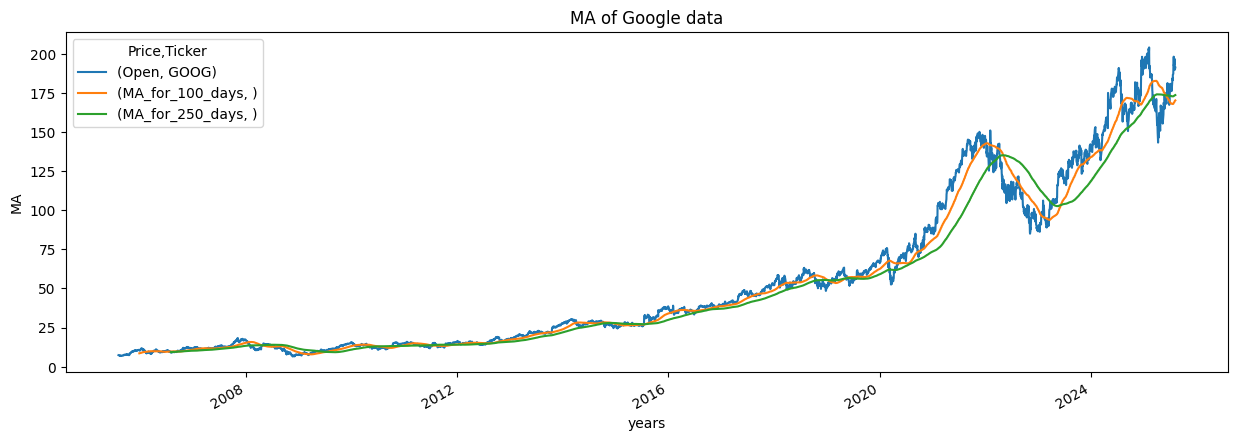

In [25]:
plot_graph((15,5), google_data[['Open','MA_for_100_days','MA_for_250_days']],'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Open'].pct_change()
google_data[['Open','percentage_change_cp']]

Price,Open,percentage_change_cp
Ticker,GOOG,
Date,,
2005-08-05,7.365943,NaN
2005-08-08,7.269380,-0.013109
2005-08-09,7.228775,-0.005586
2005-08-10,7.212433,-0.002261
2005-08-11,7.078485,-0.018572
...,...,...
2025-07-29,193.300003,-0.005710
2025-07-30,196.300003,0.015520


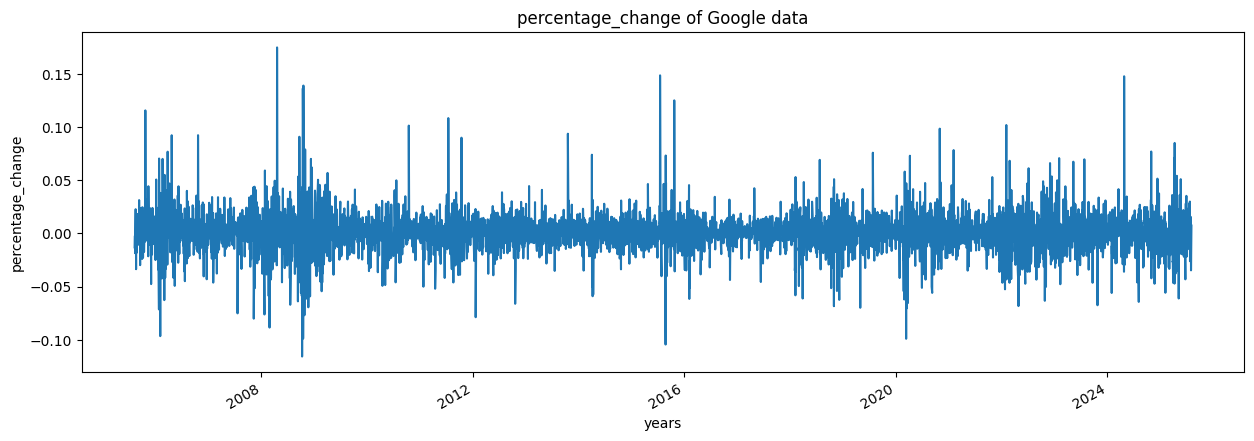

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'],'percentage_change')

In [28]:
open_price = google_data[['Open']]

In [29]:
max(open_price.values), min(open_price.values)

(array([204.02204403]), array([6.49960819]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(open_price)
scaled_data


array([[0.00438601],
       [0.00389714],
       [0.00369156],
       ...,
       [0.96242433],
       [0.92789657],
       [0.93495908]], shape=(5030, 1))

In [31]:
len(scaled_data)

5030

In [32]:
x_data= []
y_data= []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [33]:
x_data[0], y_data[0]

(array([[0.00438601],
        [0.00389714],
        [0.00369156],
        [0.00360883],
        [0.00293069],
        [0.00261355],
        [0.00342081],
        [0.00280409],
        [0.00288306],
        [0.00167969],
        [0.00231648],
        [0.00234781],
        [0.00171103],
        [0.00188778],
        [0.00251201],
        [0.00262859],
        [0.00247316],
        [0.00311871],
        [0.00322401],
        [0.0029332 ],
        [0.00300841],
        [0.00332053],
        [0.00293069],
        [0.00405132],
        [0.00435843],
        [0.00491874],
        [0.00582753],
        [0.00579368],
        [0.00463921],
        [0.00520329],
        [0.00482473],
        [0.00547028],
        [0.00575358],
        [0.00614091],
        [0.00632893],
        [0.00714371],
        [0.00657336],
        [0.00648186],
        [0.00553672],
        [0.00648186],
        [0.0064079 ],
        [0.00720012],
        [0.00629007],
        [0.00647183],
        [0.00655331],
        [0

In [34]:
int(len(x_data)*0.7)

3451

In [35]:
5030-int(len(x_data)*0.7)


1579

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]




In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(3451, 100, 1)
(3451, 1)
(1479, 100, 1)
(1479, 1)


In [38]:
# pip install keras


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

C:\Users\Suraj Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Suraj Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Suraj Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at te

In [40]:
model =  Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Suraj Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [42]:
model.fit(x_train,y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 154s 43ms/step - loss: 1.2722e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 148s 43ms/step - loss: 4.6395e-05


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step


In [45]:
predictions

array([[0.26665714],
       [0.26797238],
       [0.26851982],
       ...,
       [0.8794651 ],
       [0.8837301 ],
       [0.87171054]], shape=(1479, 1), dtype=float32)

In [46]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.170376],
       [ 59.430164],
       [ 59.538296],
       ...,
       [180.2137  ],
       [181.05614 ],
       [178.682   ]], shape=(1479, 1), dtype=float32)

In [47]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 61.11273521],
       [ 61.15647578],
       [ 61.01283456],
       ...,
       [196.6000061 ],
       [189.77999878],
       [191.17500305]], shape=(1479, 1))

In [48]:
rmse = np.sqrt(np.mean(inv_predictions - inv_y_test)**2)

In [49]:
rmse

np.float64(6.113604115302576)

In [50]:
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
          'predictions' : inv_predictions.reshape(-1)
    } , 
        index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-09-16,61.112735,59.170376
2019-09-17,61.156476,59.430164
2019-09-18,61.012835,59.538296
2019-09-19,61.238983,59.502213
2019-09-20,61.291675,59.539833


<Figure size 640x480 with 0 Axes>

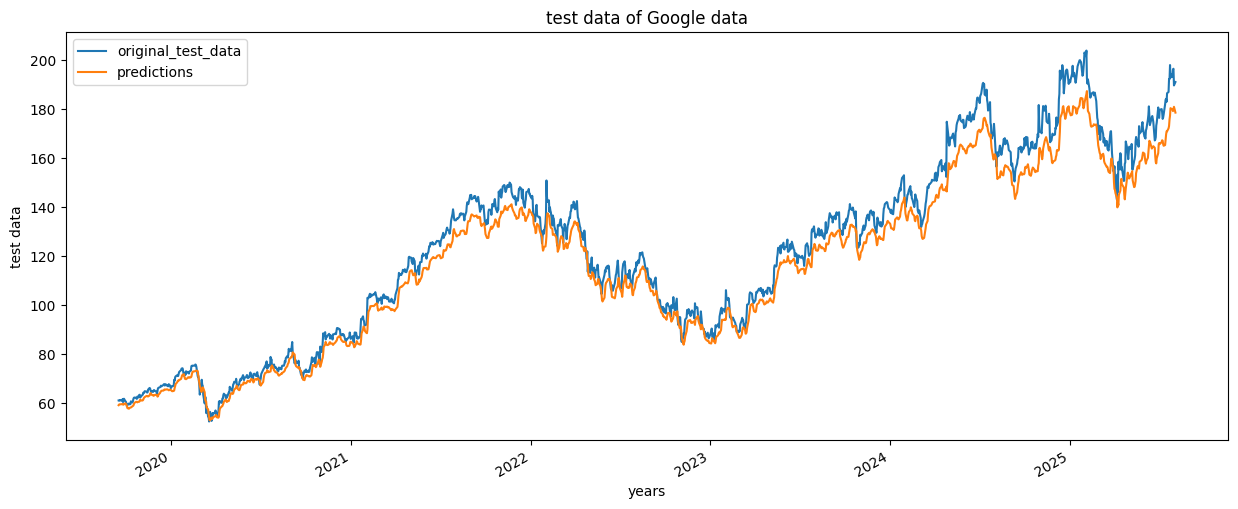

In [51]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

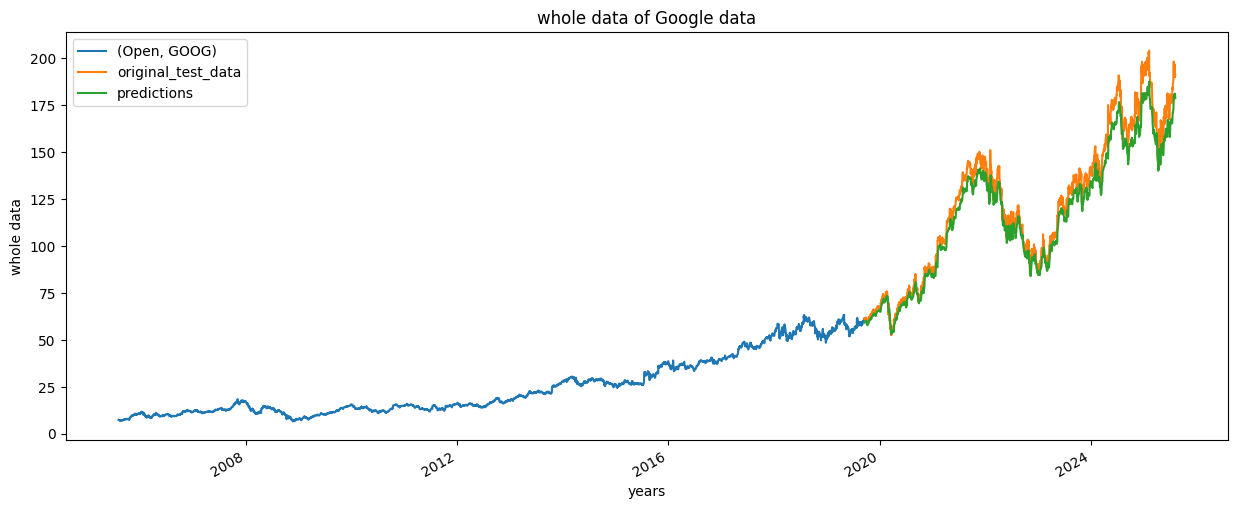

In [53]:
plot_graph((15,6), pd.concat([open_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
model.save("Latest_stock_price_model.keras")
